In [1]:
from utils.data_init import data_init
batch_size = 64
input_cycle_fraction = 0.25
voltage_loaders, current_loaders, simulation_loaders = data_init(batch_size=batch_size, input_cycle_fraction=input_cycle_fraction, delete_temp_files=True)

deleted previous preprocessing: processed_data
谐波数据集已存在，跳过下载
谐波数据集准备完成
处理车型 Tesla Model 3 (ID: 0), 找到 5 个文件
  处理文件 1/5: Waveform_2.csv
  处理文件 2/5: Waveform_5.csv
  处理文件 3/5: Waveform_3.csv
  处理文件 4/5: Waveform_1.csv
  处理文件 5/5: Waveform_4.csv
处理车型 Nissan Leaf (ID: 1), 找到 9 个文件
  处理文件 1/9: Waveform_6.csv
  处理文件 2/9: Waveform_7.csv
  处理文件 3/9: Waveform_2.csv
  处理文件 4/9: Waveform_8.csv
  处理文件 5/9: Waveform_5.csv
  处理文件 6/9: Waveform_3.csv
  处理文件 7/9: Waveform_9.csv
  处理文件 8/9: Waveform_1.csv
  处理文件 9/9: Waveform_4.csv
处理车型 Tesla Model Y (ID: 2), 找到 7 个文件
  处理文件 1/7: Waveform_6.csv
  处理文件 2/7: Waveform_7.csv
  处理文件 3/7: Waveform_2.csv
  处理文件 4/7: Waveform_5.csv
  处理文件 5/7: Waveform_3.csv
  处理文件 6/7: Waveform_1.csv
  处理文件 7/7: Waveform_4.csv
处理车型 Mitsubishi Outlander (ID: 3), 找到 9 个文件
  处理文件 1/9: Waveform_6.csv
  处理文件 2/9: Waveform_7.csv
  处理文件 3/9: Waveform_2.csv
  处理文件 4/9: Waveform_8.csv
  处理文件 5/9: Waveform_5.csv
  处理文件 6/9: Waveform_3.csv
  处理文件 7/9: Waveform_9.csv
  处理文件 8/9: Waveform


=== Voltage Dataset Analysis ===

Analyzing train data...


Processing train batches: 100%|██████████| 26/26 [00:00<00:00, 4093.23it/s]


train Statistics: Samples=25824, Mean=0.002497, Std=0.605466

Analyzing val data...


Processing val batches: 100%|██████████| 4/4 [00:00<00:00, 2818.75it/s]


val Statistics: Samples=3680, Mean=0.012835, Std=0.609202

Analyzing test data...


Processing test batches: 100%|██████████| 8/8 [00:00<00:00, 4025.24it/s]

test Statistics: Samples=7360, Mean=-0.013659, Std=0.609528

Overall Statistics: Total Samples=36864, Mean=0.000304, Std=0.606700
Value Range: [-0.999439, 0.999898]


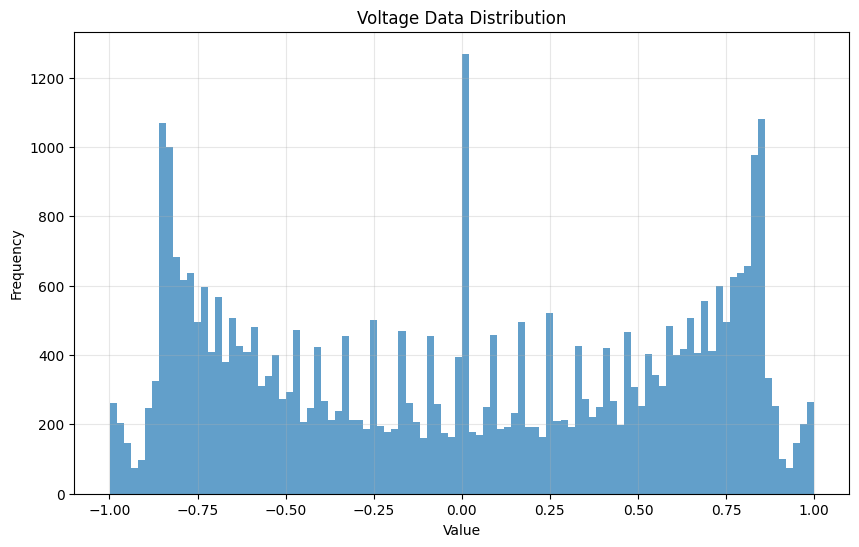


=== Current Dataset Analysis ===

Analyzing train data...


Processing train batches: 100%|██████████| 26/26 [00:00<00:00, 4447.65it/s]


train Statistics: Samples=25824, Mean=0.002266, Std=0.482554

Analyzing val data...


Processing val batches: 100%|██████████| 4/4 [00:00<00:00, 3084.61it/s]


val Statistics: Samples=3680, Mean=0.033743, Std=0.499713

Analyzing test data...


Processing test batches: 100%|██████████| 8/8 [00:00<00:00, 2692.97it/s]

test Statistics: Samples=7360, Mean=-0.023584, Std=0.491789

Overall Statistics: Total Samples=36864, Mean=0.000247, Std=0.486380
Value Range: [-1.000000, 0.965960]


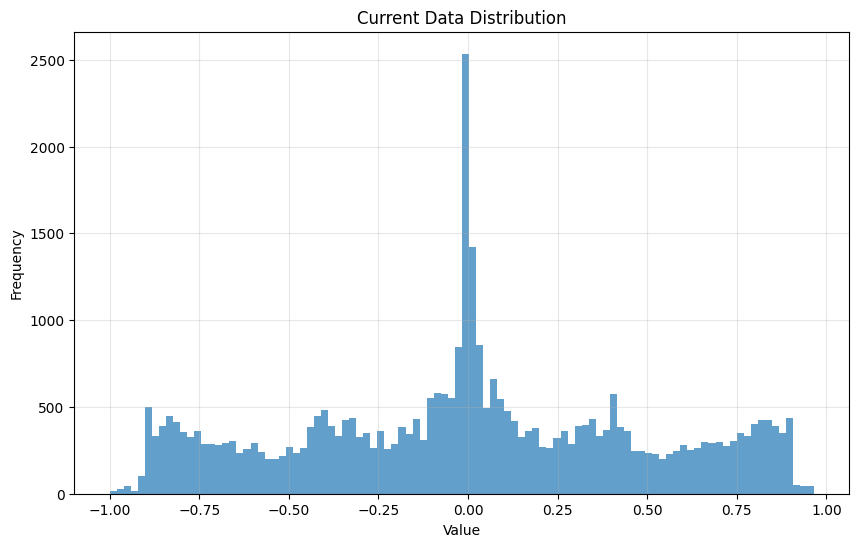


=== Simulation Dataset Analysis ===

Analyzing train data...


Processing train batches: 100%|██████████| 274/274 [00:00<00:00, 4678.13it/s]


train Statistics: Samples=280000, Mean=-0.001448, Std=0.612078

Analyzing val data...


Processing val batches: 100%|██████████| 40/40 [00:00<00:00, 4790.48it/s]


val Statistics: Samples=40000, Mean=0.006174, Std=0.618534

Analyzing test data...


Processing test batches: 100%|██████████| 79/79 [00:00<00:00, 5073.34it/s]

test Statistics: Samples=80000, Mean=-0.007854, Std=0.610414

Overall Statistics: Total Samples=400000, Mean=-0.001967, Std=0.612406
Value Range: [-0.979212, 0.973705]


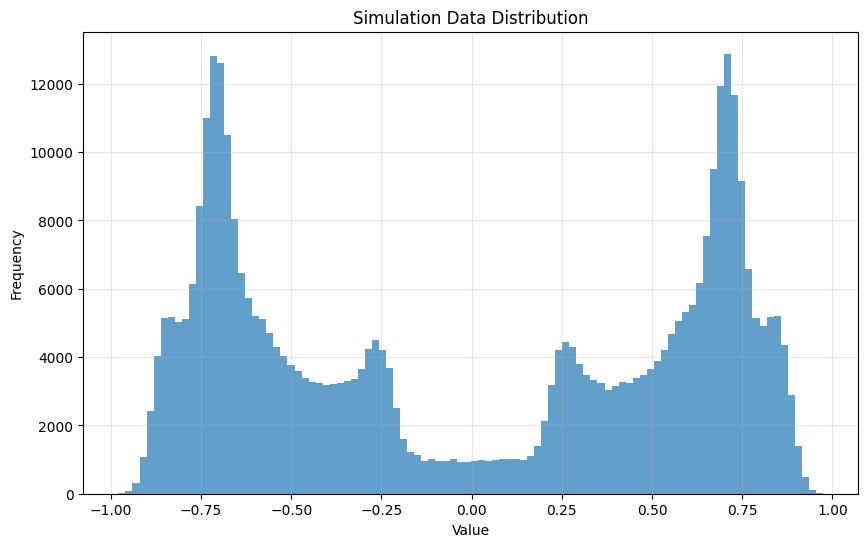


=== Dataset Comparison ===


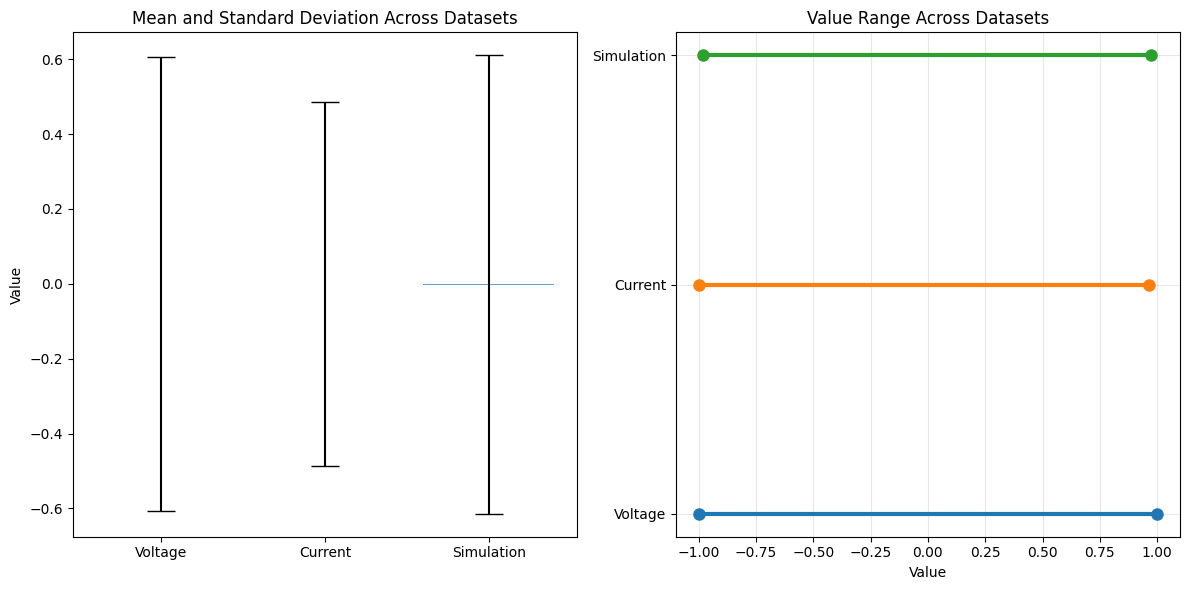

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def analyze_dataset(loaders, dataset_name):
    """Analyze statistical information of a dataset"""
    print(f"\n=== {dataset_name} Dataset Analysis ===")
    
    # Initialize statistical variables
    all_data = []
    min_val = float('inf')
    max_val = float('-inf')
    total_samples = 0
    
    # Iterate through data loaders
    for phase in loaders:
        print(f"\nAnalyzing {phase} data...")
        loader = loaders[phase]
        phase_samples = 0
        phase_sum = 0
        phase_sq_sum = 0
        
        for batch in tqdm(loader, desc=f"Processing {phase} batches"):
            # Assume data is in the first element
            if isinstance(batch, (list, tuple)):
                data = batch[0]
            else:
                data = batch
                
            # Convert to numpy array
            if isinstance(data, torch.Tensor):
                data = data.numpy()
                
            # Update statistical information
            batch_samples = data.size
            total_samples += batch_samples
            phase_samples += batch_samples
            
            phase_sum += np.sum(data)
            phase_sq_sum += np.sum(data**2)
            
            min_val = min(min_val, np.min(data))
            max_val = max(max_val, np.max(data))
            
            all_data.append(data.flatten())
        
        # Calculate phase statistics
        phase_mean = phase_sum / phase_samples
        phase_std = np.sqrt(phase_sq_sum/phase_samples - phase_mean**2)
        print(f"{phase} Statistics: Samples={phase_samples}, Mean={phase_mean:.6f}, Std={phase_std:.6f}")
    
    # Combine all data
    if all_data:
        all_data = np.concatenate(all_data)
        overall_mean = np.mean(all_data)
        overall_std = np.std(all_data)
        
        print(f"\nOverall Statistics: Total Samples={total_samples}, Mean={overall_mean:.6f}, Std={overall_std:.6f}")
        print(f"Value Range: [{min_val:.6f}, {max_val:.6f}]")
        
        # Plot histogram
        plt.figure(figsize=(10, 6))
        plt.hist(all_data, bins=100, alpha=0.7)
        plt.title(f"{dataset_name} Data Distribution")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.grid(True, alpha=0.3)
        plt.show()
        
        return {
            'mean': overall_mean,
            'std': overall_std,
            'min': min_val,
            'max': max_val,
            'samples': total_samples
        }
    else:
        print("No data found")
        return None

# Analyze voltage data
voltage_stats = analyze_dataset(voltage_loaders, "Voltage")

# Analyze current data
current_stats = analyze_dataset(current_loaders, "Current")

# Analyze simulation data
simulation_stats = analyze_dataset(simulation_loaders, "Simulation")

# Compare statistical information across different datasets
print("\n=== Dataset Comparison ===")
if voltage_stats and current_stats and simulation_stats:
    datasets = [voltage_stats, current_stats, simulation_stats]
    names = ["Voltage", "Current", "Simulation"]
    
    plt.figure(figsize=(12, 6))
    
    # Plot mean comparison
    plt.subplot(1, 2, 1)
    means = [d['mean'] for d in datasets]
    stds = [d['std'] for d in datasets]
    plt.bar(names, means, yerr=stds, alpha=0.7, capsize=10)
    plt.title("Mean and Standard Deviation Across Datasets")
    plt.ylabel("Value")
    
    # Plot value range comparison
    plt.subplot(1, 2, 2)
    for i, (name, stats) in enumerate(zip(names, datasets)):
        plt.plot([stats['min'], stats['max']], [i, i], 'o-', linewidth=3, markersize=8)
    plt.yticks(range(len(names)), names)
    plt.title("Value Range Across Datasets")
    plt.xlabel("Value")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()